In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
plt.ticklabel_format(useOffset=False)

%matplotlib inline
import math
from datetime import datetime
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss

In [3]:
data=pd.read_csv('Accidents0515.csv')
data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863


In [4]:
data.shape

(1780653, 32)

In [5]:
data.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,1.780515e+06,1.780515e+06,1.780515e+06,1.780515e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,...,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06
mean,4.401799e+05,2.985128e+05,-1.428579e+00,5.257450e+01,3.075348e+01,2.838219e+00,1.832064e+00,1.349454e+00,4.115302e+00,3.532614e+02,...,3.782832e+02,9.261209e-03,7.375014e-01,1.950535e+00,1.575724e+00,1.358392e+00,1.090639e-01,7.219374e-02,1.356260e+00,1.193455e+00
std,9.547599e+04,1.612254e+05,1.403495e+00,1.451753e+00,2.551787e+01,4.017948e-01,7.148732e-01,8.237479e-01,1.923763e+00,2.593133e+02,...,1.297375e+03,1.276795e-01,1.818855e+00,1.648467e+00,1.642447e+00,6.243018e-01,7.304625e-01,6.193070e-01,4.790610e-01,4.011830e-01
min,6.495000e+04,1.029000e+04,-7.516225e+00,4.991294e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-1.000000e+00
25%,3.764000e+05,1.779900e+05,-2.354786e+00,5.148769e+01,7.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.220000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
50%,4.413200e+05,2.649500e+05,-1.386472e+00,5.227209e+01,3.100000e+01,3.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,3.280000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
75%,5.234235e+05,3.965700e+05,-2.164865e-01,5.346409e+01,4.600000e+01,3.000000e+00,2.000000e+00,1.000000e+00,6.000000e+00,5.310000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00
max,6.555400e+05,1.208800e+06,1.762010e+00,6.075754e+01,9.800000e+01,3.000000e+00,6.700000e+01,9.300000e+01,7.000000e+00,9.410000e+02,...,9.999000e+03,2.000000e+00,8.000000e+00,7.000000e+00,9.000000e+00,5.000000e+00,7.000000e+00,7.000000e+00,3.000000e+00,3.000000e+00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780653 entries, 0 to 1780652
Data columns (total 32 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   Location_Easting_OSGR                        float64
 2   Location_Northing_OSGR                       float64
 3   Longitude                                    float64
 4   Latitude                                     float64
 5   Police_Force                                 int64  
 6   Accident_Severity                            int64  
 7   Number_of_Vehicles                           int64  
 8   Number_of_Casualties                         int64  
 9   Date                                         object 
 10  Day_of_Week                                  int64  
 11  Time                                         object 
 12  Local_Authority_(District)                   int64  
 13  Local_Author

In [7]:
data.isnull()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780648,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1780649,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1780650,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1780651,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [8]:
data.isnull().sum()

Accident_Index                                      0
Location_Easting_OSGR                             138
Location_Northing_OSGR                            138
Longitude                                         138
Latitude                                          138
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              151
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

<AxesSubplot:>

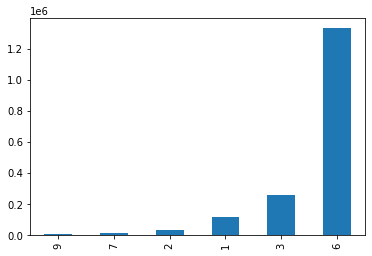

In [9]:
data['Road_Type'].value_counts().sort_values().plot.bar()

<AxesSubplot:>

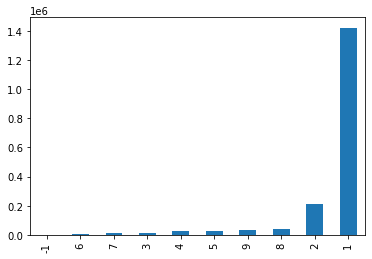

In [10]:
data['Weather_Conditions'].value_counts().sort_values().plot.bar()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '6'),
  Text(4, 0, '7'),
  Text(5, 0, '9')])

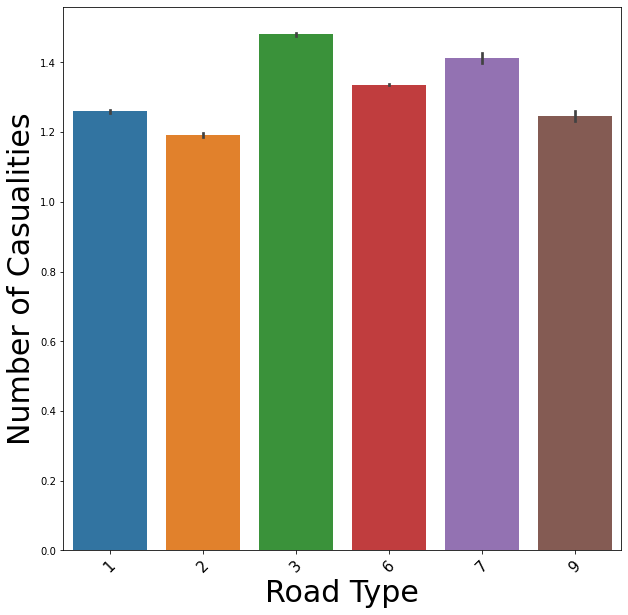

In [12]:
fig_dims=(10,10)
fig,ax=plt.subplots(figsize=fig_dims)
sns.barplot(x='Road_Type',y='Number_of_Casualties',data=data,ax=ax)
plt.ylabel('Number of Casualities',fontsize=30)
plt.xlabel('Road Type',fontsize=30)
plt.xticks(rotation=45,fontsize=15)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '-1'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

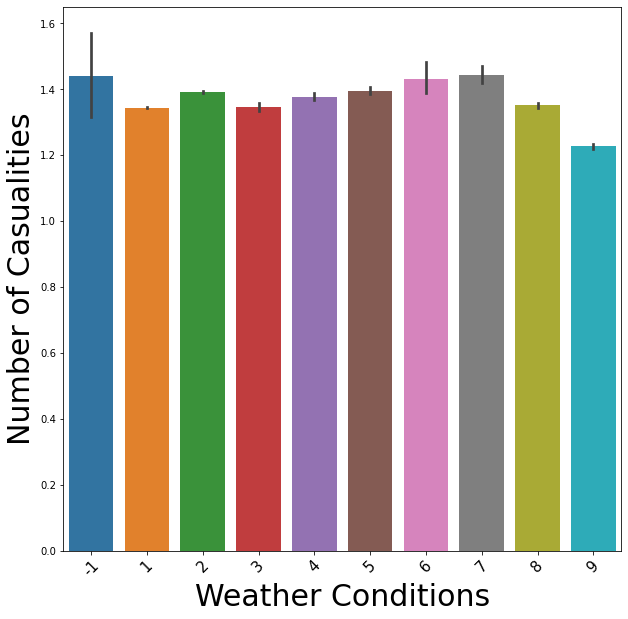

In [13]:
fig_dims=(10,10)
fig,ax=plt.subplots(figsize=fig_dims)
sns.barplot(x='Weather_Conditions',y='Number_of_Casualties',data=data,ax=ax)
plt.ylabel('Number of Casualities',fontsize=30)
plt.xlabel('Weather Conditions',fontsize=30)
plt.xticks(rotation=45,fontsize=15)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '6'),
  Text(4, 0, '7'),
  Text(5, 0, '9')])

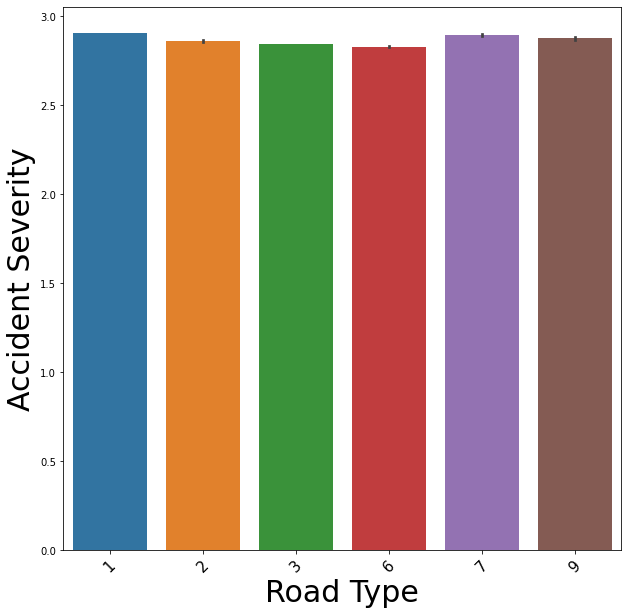

In [14]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "Road_Type", y = "Accident_Severity", data = data, ax = ax)
plt.ylabel("Accident Severity", fontsize = 30)
plt.xlabel("Road Type", fontsize = 30)
plt.xticks(rotation = 45, fontsize = 15)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '-1'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

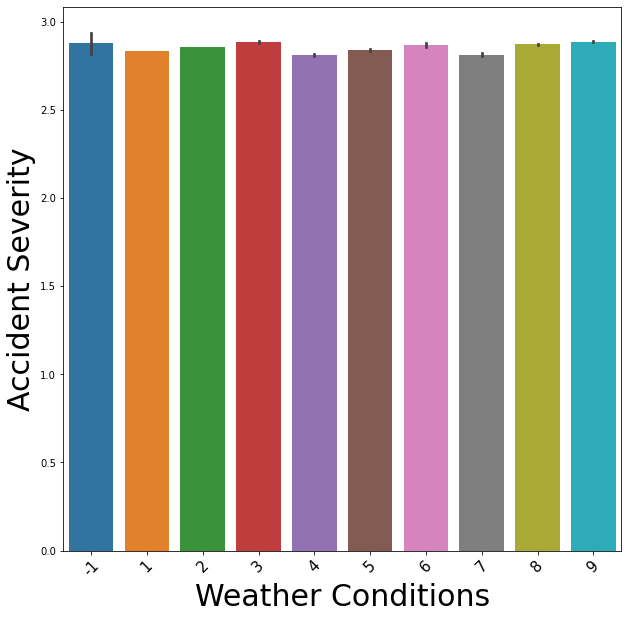

In [15]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "Weather_Conditions", y = "Accident_Severity", data = data, ax = ax)
plt.ylabel("Accident Severity", fontsize = 30)
plt.xlabel("Weather Conditions", fontsize = 30)
plt.xticks(rotation = 45, fontsize = 15)

In [19]:
def full_date(row):
    try:
        newdate = datetime.strptime(row['Date'] + ' ' + str(row['Time']), '%d/%m/%Y %H:%M') 
    except:
        row['Time'] = '00:00'
        newdate = datetime.strptime(row['Date'] + ' ' + str(row['Time']), '%d/%m/%Y %H:%M')
    return newdate

In [20]:
data['FullDate'] = data.apply(lambda row: full_date(row),axis=1)
data['datetime'] = pd.to_datetime(data['FullDate'])

<AxesSubplot:xlabel='FullDate'>

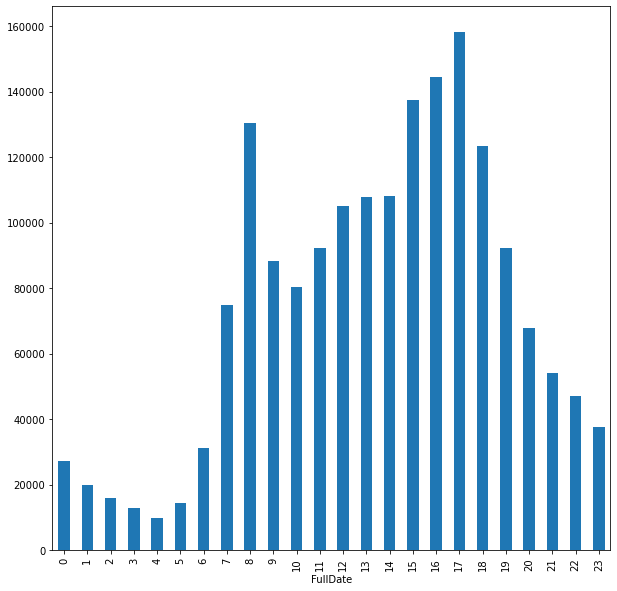

In [21]:
plt.figure(figsize=(10,10))
data['FullDate'].groupby(data['FullDate'].dt.hour).count().plot(kind='bar')

In [22]:
df=data.set_index('datetime')
df.drop(['Date'],axis=1,inplace=True)

df.head()
df_years=df['FullDate'].groupby([df.index.year,df.index.month,df.Accident_Severity]).count()
df_years=df_years.reset_index(level=0,inplace=False)

df_years=df_years.rename(index=str,columns={'datetime':'year'})

df_years=df_years.reset_index(level=0,inplace=False)

df_years=df_years.rename(index=str,columns={'datetime':'month'})

In [23]:
df_years=df_years.reset_index(level=0,inplace=False)

In [24]:
df_pivot=pd.pivot_table(df_years,index=['month'],columns=['Accident_Severity','year'],values=['FullDate'])
df_pivot

FullDate                                               ...  \
Accident_Severity        1                                               ...   
year                  2005 2006 2007 2008 2009 2010 2011 2012 2013 2014  ...   
month                                                                    ...   
1                      241  222  239  208  189  120  148  130  121  118  ...   
10                     259  283  245  233  169  170  142  126  151  140  ...   
11                     293  256  238  211  165  150  163  135  145  161  ...   
12                     275  286  235  198  148  106  150  172  144  179  ...   
2                      197  231  173  169  158  126  131  115   91  112  ...   
3                      237  184  212  176  164  136  146  149  109  126  ...   
4                      198  231  231  174  177  124  150  114  127  135  ...   
5                      224  217  230  209  174  164  137  138  155  121  ...   
6                      244  239  201  164  170  153  165  121  127  147  ...   
7                      238  241  225  234  173  133  145  151  152  134  ...   
8                      244  263  260  182  199  185  163  138  138  138  ...   
9                      263  273  225  183  171  164  157  148  148  147  ...   

                                                                           \
Accident_Severity      3                                                    
year                2006   2007   2008   2009   2010   2011   2012   2013   
month                                                                       
1                  12706  13107  12129  11491   9273  10059  10063   8784   
10                 14629  13190  13359  12673  12335  11704  11223  11378   
11                 14872  14178  12656  13417  12633  11229  11287  11245   
12                 13815  12609  11817  11965   9063  10867   9977  10116   
2                  12064  11441  12272   9387  10180   9561   9220   8308   
3                  12863  12886  11503  11292  11317  10591  10238   8828   
4                  11724  11815  11415  10685  10391  10398   9257   8388   
5                  13762  13614  12117  11672  11151  10746  10353   9583   
6                  13522  13238  11968  11752  11582  11111   9699   9969   
7                  14085  13421  12415  12226  11489  11082  10778  10890   
8                  12962  12655  11278  11345  11049  10101   9966   9833   
9                  14285  12925  12200  11595  11780  11242  10972  10106   

                                 
Accident_Severity                
year                2014   2015  
month                            
1                  10365   9967  
10                 11410  10442  
11                 11324  10478  
12                 10252   9752  
2                   9263   8802  
3                  10110   9350  
4                   9255   9193  
5                  10445   9560  
6                  10477  10200  
7                  10956  10817  
8                  10218   9514  
9                   9913  10327  

[12 rows x 33 columns]

<AxesSubplot:title={'center':'Slight'}, xlabel='month'>

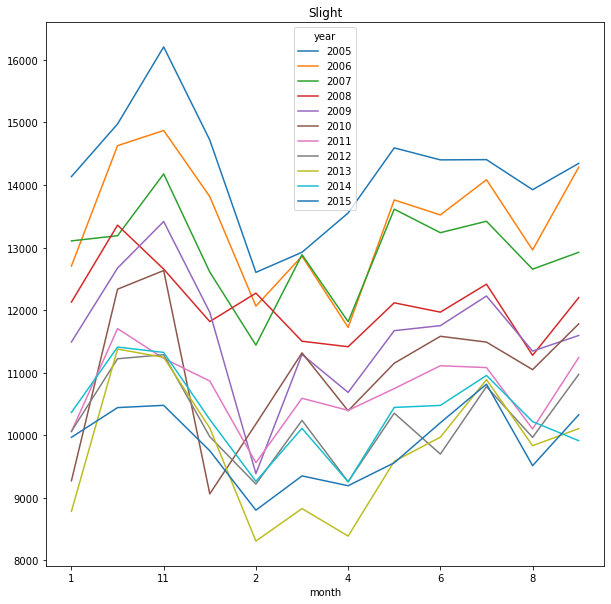

In [26]:
df_pivot['FullDate']['3'].plot(figsize=(10,10),title='Slight')

<AxesSubplot:title={'center':'serious'}, xlabel='month'>

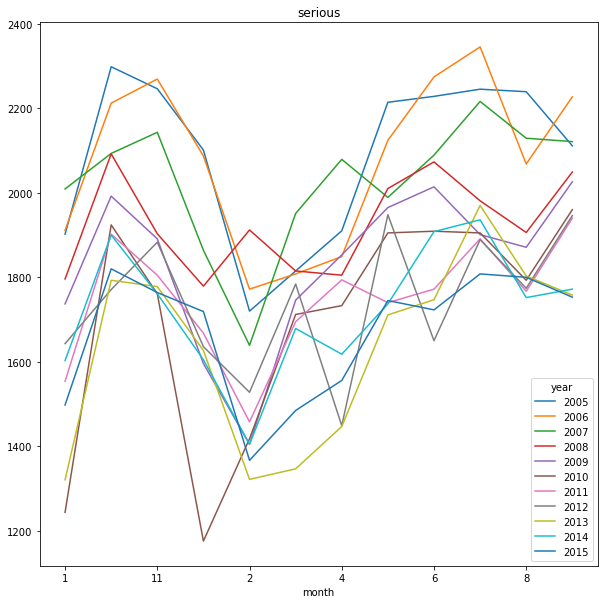

In [27]:
df_pivot['FullDate']['2'].plot(figsize=(10,10),title='serious')

<AxesSubplot:title={'center':'Fatal'}, xlabel='month'>

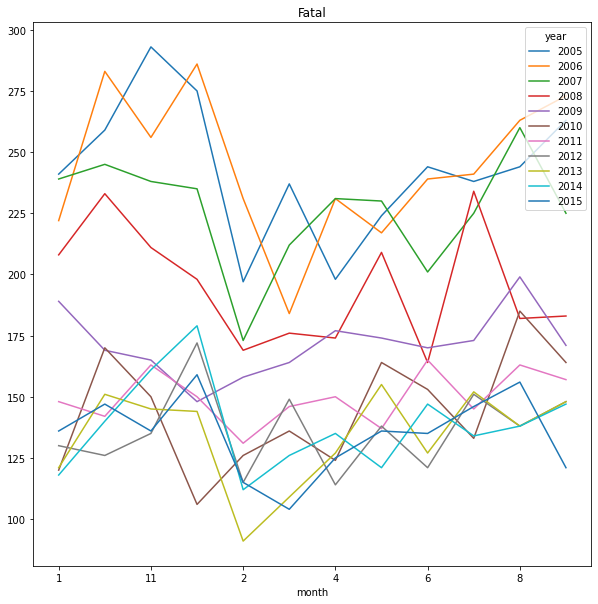

In [28]:
df_pivot['FullDate']['1'].plot(figsize=(10,10),title='Fatal')

### Data Wrangling

In [29]:
data.isnull().sum()

Accident_Index                                      0
Location_Easting_OSGR                             138
Location_Northing_OSGR                            138
Longitude                                         138
Latitude                                          138
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              151
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

<AxesSubplot:>

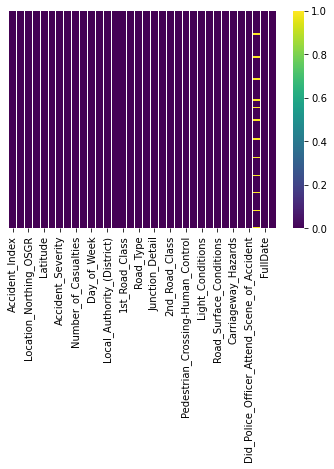

In [30]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

In [31]:
dated=data.drop(['Junction_Detail','Junction_Control','LSOA_of_Accident_Location'],axis=1)

In [32]:
dated.isnull().sum()

Accident_Index                                   0
Location_Easting_OSGR                          138
Location_Northing_OSGR                         138
Longitude                                      138
Latitude                                       138
Police_Force                                     0
Accident_Severity                                0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Date                                             0
Day_of_Week                                      0
Time                                           151
Local_Authority_(District)                       0
Local_Authority_(Highway)                        0
1st_Road_Class                                   0
1st_Road_Number                                  0
Road_Type                                        0
Speed_limit                                      0
2nd_Road_Class                                   0
2nd_Road_Number                

In [33]:
dated=dated.dropna()

In [34]:
dated.isnull().sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-

<AxesSubplot:>

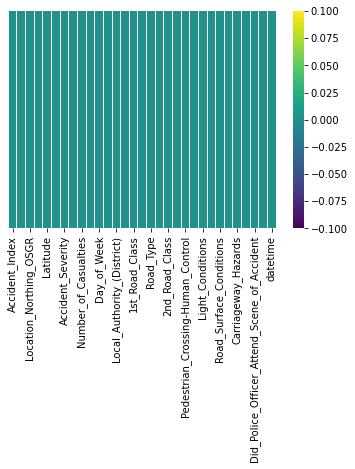

In [35]:
sns.heatmap(dated.isnull(),yticklabels=False,cmap='viridis')

In [36]:
dated=data.iloc[:1000]

In [39]:
location = dated['Latitude'].mean(), dated['Longitude'].mean()
m = folium.Map(location=location,zoom_start=15)#zoom_start=배율
for i in range(0,len(dated)):
    folium.Marker([dated['Latitude'].iloc[i],dated['Longitude'].iloc[i]]).add_to(m)

In [40]:
m

In [43]:
location=dated['Latitude'].mean(),dated['Longitude'].mean()
m=folium.Map(location=location,zoom_start=15)

for i in range(0,len(dated)):
    popup = folium.Popup('Accident',parse_html=True)
    folium.Marker([dated['Latitude'].iloc[i],dated['Longitude'].iloc[i]],popup=popup).add_to(m)
m

In [44]:
dated['Number_of_Casualties'].value_counts()

1    905
2     79
3      8
4      6
8      1
5      1
Name: Number_of_Casualties, dtype: int64

In [45]:
location=dated['Latitude'].mean(),dated['Longitude'].mean()
m=folium.Map(location=location,zoom_start=15)

for i in range(0,len(dated)):
    num_of_casualties=dated['Number_of_Casualties'].iloc[i]
    if num_of_casualties==1:
        color='blue'
    elif num_of_casualties==2:
        color='green'
    else:
        color='red'
        
    popup=folium.Popup('Accident',parse_html=True)
    folium.Marker([dated['Latitude'].iloc[i],dated['Longitude'].iloc[i]],popup=popup,icon=folium.Icon(color=color,icon='info_sign')).add_to(m)
    
m

In [46]:
dated.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,FullDate,datetime
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,1,2,2,0,0,1,1,E01002849,2005-01-04 17:42:00,2005-01-04 17:42:00
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,4,1,1,0,0,1,1,E01002909,2005-01-05 17:36:00,2005-01-05 17:36:00
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,4,1,1,0,0,1,1,E01002857,2005-01-06 00:15:00,2005-01-06 00:15:00
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,1,1,1,0,0,1,1,E01002840,2005-01-07 10:35:00,2005-01-07 10:35:00
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,7,1,2,0,0,1,1,E01002863,2005-01-10 21:13:00,2005-01-10 21:13:00


In [47]:
dated.drop(["Carriageway_Hazards", "Date", "Day_of_Week", "2nd_Road_Number"], axis =1, inplace = True)

C:\anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
dated=dated.iloc[0:1000]

In [49]:
dated.shape

(1000, 30)

In [50]:
datag = pd.get_dummies(dated[["Road_Type","Pedestrian_Crossing-Human_Control", "Pedestrian_Crossing-Physical_Facilities", "Light_Conditions", "Weather_Conditions", "Road_Surface_Conditions"]], drop_first = True)

In [51]:
datag

,Road_Type,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions
0,6,0,1,1,2,2
1,3,0,5,4,1,1
2,6,0,0,4,1,1
3,6,0,0,1,1,1
4,6,0,0,7,1,2
...,...,...,...,...,...,...
995,3,0,0,1,1,1
996,6,0,5,4,8,1
997,6,0,0,4,2,2
998,3,0,0,1,1,1


In [52]:
kaggle_data=pd.concat([dated,datag],axis=1)

In [53]:
kaggle_data

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Time,...,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,FullDate,datetime,Road_Type,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,17:42,...,1,E01002849,2005-01-04 17:42:00,2005-01-04 17:42:00,6,0,1,1,2,2
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,17:36,...,1,E01002909,2005-01-05 17:36:00,2005-01-05 17:36:00,3,0,5,4,1,1
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,00:15,...,1,E01002857,2005-01-06 00:15:00,2005-01-06 00:15:00,6,0,0,4,1,1
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,10:35,...,1,E01002840,2005-01-07 10:35:00,2005-01-07 10:35:00,6,0,0,1,1,1
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,21:13,...,1,E01002863,2005-01-10 21:13:00,2005-01-10 21:13:00,6,0,0,7,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200501CP00258,531560.0,181570.0,-0.105285,51.517685,48,3,2,1,08:45,...,1,E01000004,2005-11-08 08:45:00,2005-11-08 08:45:00,3,0,0,1,1,1
996,200501CP00259,531390.0,181570.0,-0.107733,51.517725,48,3,2,1,21:00,...,1,E01000004,2005-11-08 21:00:00,2005-11-08 21:00:00,6,0,5,4,8,1
997,200501CP00260,531550.0,181650.0,-0.105399,51.518406,1,3,1,1,22:30,...,1,E01000004,2005-11-09 22:30:00,2005-11-09 22:30:00,6,0,0,4,2,2
998,200501CP00261,532390.0,180820.0,-0.093611,51.510751,48,3,2,1,14:31,...,1,E01000004,2005-11-09 14:31:00,2005-11-09 14:31:00,3,0,0,1,1,1


In [54]:
kaggle_data.drop(["Road_Type","Pedestrian_Crossing-Human_Control", "Pedestrian_Crossing-Physical_Facilities", "Light_Conditions", "Weather_Conditions", "Road_Surface_Conditions"], axis =1, inplace = True)

In [55]:
kaggle_data.drop(["Did_Police_Officer_Attend_Scene_of_Accident"], axis = 1, inplace  = True)

In [56]:
X = kaggle_data.drop("Accident_Severity", axis =1)
y = kaggle_data["Accident_Severity"]

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [58]:
X_train.shape

(800, 22)

In [59]:
X_train_ = X_train[['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Number_of_Vehicles',
       'Number_of_Casualties', '1st_Road_Class',
       '1st_Road_Number', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', 'Urban_or_Rural_Area']]

### KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2,metric='euclidean')

In [61]:
knn.fit(X_train_,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [62]:
X_test_ = X_test[['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Number_of_Vehicles',
       'Number_of_Casualties', '1st_Road_Class',
       '1st_Road_Number', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', 'Urban_or_Rural_Area']]

In [63]:
y_pred = knn.predict(X_test_)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.09      0.36      0.15        14
           3       0.93      0.74      0.82       185

    accuracy                           0.70       200
   macro avg       0.34      0.36      0.32       200
weighted avg       0.87      0.70      0.77       200



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
confusion_matrix(y_test, y_pred)

array([[  0,   0,   1],
       [  0,   5,   9],
       [  0,  49, 136]], dtype=int64)

In [67]:
accuracy_score(y_test, y_pred)

0.705

### Decision Tree

In [69]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_, y_train)
Y_pred = decision_tree.predict(X_test_)
acc_decision_tree1 = round(decision_tree.score(X_test_, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 76.0
              precision    recall  f1-score   support

           1   0.000000  0.000000  0.000000         1
           2   0.028571  0.071429  0.040816        14
           3   0.915152  0.816216  0.862857       185

    accuracy                       0.760000       200
   macro avg   0.314574  0.295882  0.301224       200
weighted avg   0.848515  0.760000  0.801000       200



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predicted,2,3,All
Actual,,,
1,0,1,1
2,1,13,14
3,34,151,185
All,35,165,200


### RandomForest

In [70]:
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train_,y_train)
Y_pred = random_forest.predict(X_test_)
random_forest.score(X_test_, y_test)
acc_random_forest1 = round(random_forest.score(X_test_, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 87.0
              precision    recall  f1-score   support

           1   0.000000  0.000000  0.000000         1
           2   0.076923  0.071429  0.074074        14
           3   0.925134  0.935135  0.930108       185

    accuracy                       0.870000       200
   macro avg   0.334019  0.335521  0.334727       200
weighted avg   0.861133  0.870000  0.865535       200



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predicted,2,3,All
Actual,,,
1,0,1,1
2,1,13,14
3,12,173,185
All,13,187,200
